In [1]:
# hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)


# # Create a figure with 2 rows and 2 columns of subplots,
# # with an overall figure size of 10x8 inches
# fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# # Plot on the subplots (example)
# axes[0, 0].plot([0, 1], [0, 1])
# axes[0, 1].plot([0, 1], [1, 0])
# axes[1, 0].plot([0, 1], [0.5, 0.5])
# axes[1, 1].plot([0, 1], [0, 0.5])

# plt.tight_layout() # Adjusts subplot parameters for a tight layout
# plt.show()


# plt.subplot(1, 2, 1)
# plt.plot(bins_hist, hist, 'k');
# plt.xlabel("Pixel values")
# plt.ylabel("Probability")
# plt.title("Histogram (PDF) before");

# hist, bins_hist = exposure.histogram(I2, nbins=256, normalize=True)

# plt.subplot(1, 2, 2)
# plt.plot(bins_hist, hist, 'k')
# plt.xlabel("Pixel values")
# plt.ylabel("Probability")
# plt.title("Histogram (PDF) after");

# Loading dependencies

In [2]:
import numpy as np
import skimage as ski
from skimage import io, color, exposure
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Point processing

Point processing takes each pixel value and processes them through a function -

$$I_{processed} = f(I)$$

Since it processes all the pixels, it can be regarded as a global processing.

In [4]:
np.random.seed(43)
I = np.random.rand(3, 3)
print(I)

[[0.11505457 0.60906654 0.13339096]
 [0.24058962 0.32713906 0.85913749]
 [0.66609021 0.54116221 0.02901382]]


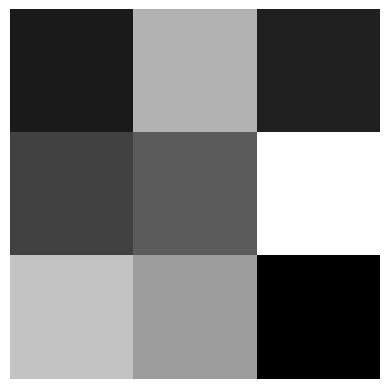

In [5]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

In [6]:
I2 = I + 0.5
print(I2)

[[0.61505457 1.10906654 0.63339096]
 [0.74058962 0.82713906 1.35913749]
 [1.16609021 1.04116221 0.52901382]]


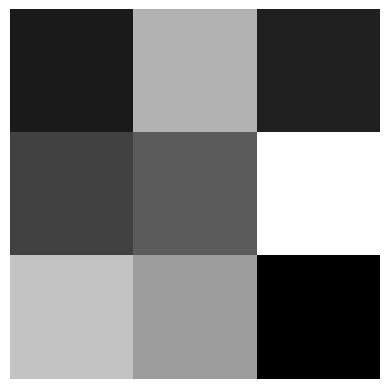

In [7]:
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

In [8]:
# option 1
I2[I2 > 1] = 1
I2[I2 < 0] = 0

# option 2
I2 = np.clip(I+0.5, 0, 1)

print(I)
print()
print(I2)

[[0.11505457 0.60906654 0.13339096]
 [0.24058962 0.32713906 0.85913749]
 [0.66609021 0.54116221 0.02901382]]

[[0.61505457 1.         0.63339096]
 [0.74058962 0.82713906 1.        ]
 [1.         1.         0.52901382]]


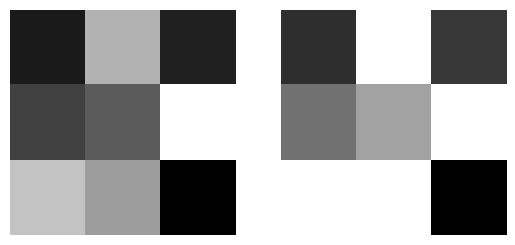

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off");

plt.subplot(1, 2, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

In [10]:
I3 = np.clip(I - 0.5, 0, 1)

print(I)
print()
print(I3)

[[0.11505457 0.60906654 0.13339096]
 [0.24058962 0.32713906 0.85913749]
 [0.66609021 0.54116221 0.02901382]]

[[0.         0.10906654 0.        ]
 [0.         0.         0.35913749]
 [0.16609021 0.04116221 0.        ]]


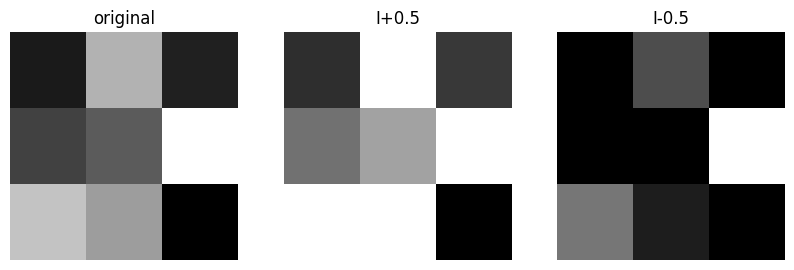

In [11]:
plt.figure(figsize = (10, 18))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.title("original");

plt.subplot(1, 3, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off")
plt.title("I+0.5");

plt.subplot(1, 3, 3)
plt.imshow(I3, cmap = 'grey')
plt.axis("off")
plt.title("I-0.5");

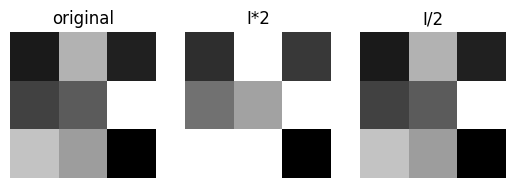

In [12]:
I2 = np.clip(I*2, 0, 1)
I3 = np.clip(I/2, 0, 1)

plt.subplot(1, 3, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.title("original");

plt.subplot(1, 3, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off")
plt.title("I*2");

plt.subplot(1, 3, 3)
plt.imshow(I3, cmap = 'grey')
plt.axis("off")
plt.title("I/2");

# Landsat image

In [14]:
I = io.imread("/content/sample_1.jpeg")

Typically, skimage loads image in 8 bit format. However, skimage can also load 16 and 32 bit images.

In [15]:
print(I.dtype)

uint8


In [16]:
I = ski.img_as_float(I)
I.shape

(1901, 2010)

In [17]:
print(I.min())
print(I.max())

0.0
1.0


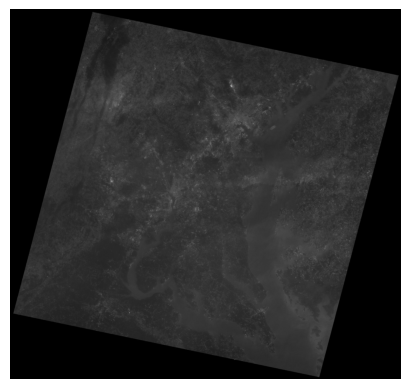

In [19]:
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.show()

Lets contrast stretch the image using the function -
$$I_{out} = 4 * (I_{in} - 0.1) $$


In [20]:
#WRONG
I_stretched = 4*(I-0.1)

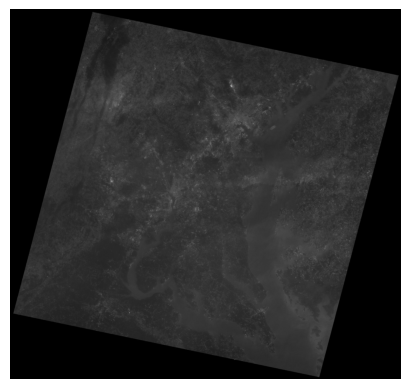

In [21]:
plt.imshow(I_stretched, cmap = 'grey');
plt.axis("off")
plt.show()

In [22]:
print(I_stretched.min())
print(I_stretched.max())

-0.4
3.6


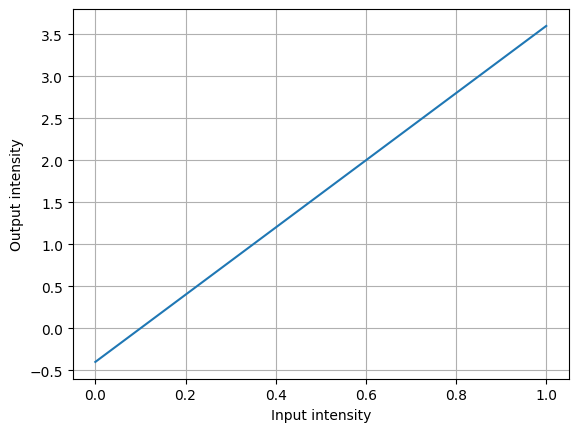

In [23]:
i_1 = np.linspace(0, 1, 10000)
i_2 = 4*(i_1 - 0.1)
plt.plot(i_1, i_2);
plt.grid();
plt.xlabel("Input intensity");
plt.ylabel("Output intensity");

The values on the output side exceeds the range [0, 1]

In [24]:
#RIGHT
I_stretched = np.clip(4*(I-0.1), 0, 1)

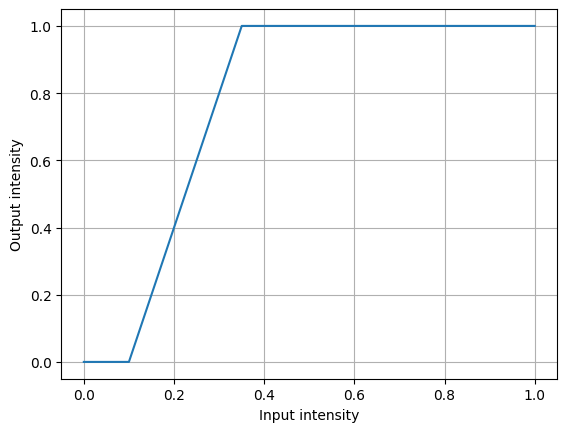

In [25]:
i_1 = np.linspace(0, 1, 10000)
i_2 = np.clip(4*(i_1 - 0.1), 0, 1)
plt.plot(i_1, i_2);
plt.grid();
plt.xlabel("Input intensity");
plt.ylabel("Output intensity");

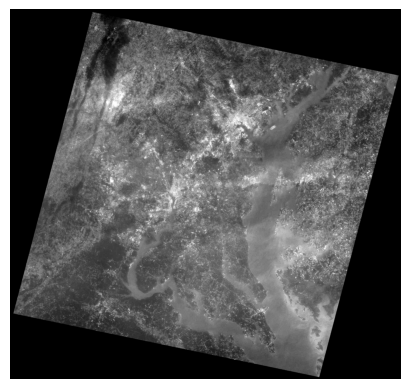

In [26]:
plt.imshow(I_stretched, cmap = 'grey');
plt.axis("off")
plt.show()

So the image is brighter now. But why did this work? How did we get this function? We got it from the histogram.

Text(0.5, 1.0, 'Histogram (PDF) before')

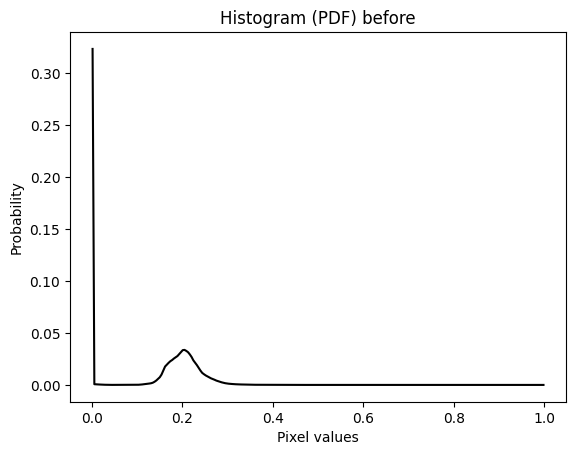

In [27]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) before")

Pixel values saturated in 0.1 to 0.35 region, the same region where we are stretching the contrast.

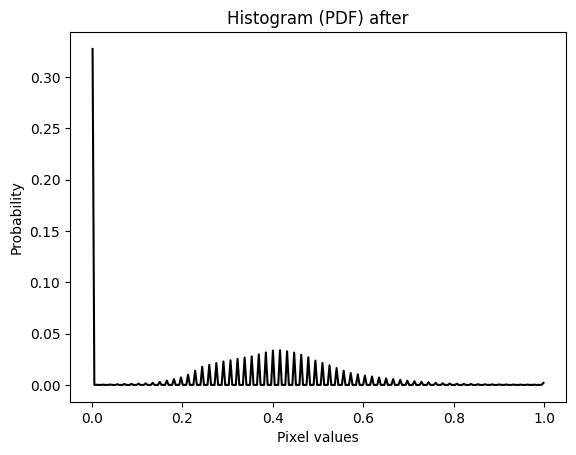

In [28]:
hist, bins_hist = exposure.histogram(I_stretched, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) after");

The pixel values are now more spread out. The sharp shape comes from **discretizing** the values into bin. Look up histograms to understand. Increase bins for smoother graph.

So how can we derive the contrast strectching function? Follow this formula -

$$I_{streched} = \frac{I - c_{min}}{c_{max} - c_{min}}*(I_{max} - I_{min}) + I_{min}$$

Here, $C_{min}$ is the lower pixel value from the histogram that you would like to stretch to $I_{min}$, $C_{max}$ is the upper pixel value from the histogram that you would like to strectch to $I_{max}$.

For normalized image, $I_{max} = 1$ and $I_{min} = 0$

In this certain example, $c_{min} = 0.1$ and $c_{max} = 0.35$. So the formula boils down to -

$$I_{streched} = \frac{I - 0.1}{0.35 - 0.1}*(1 - 0) + 0 = 4*(I - 0.1)$$

which is our exact formula.



**Derivation -**

The formula is basically derived from the output intensity vs the input intensity curve.

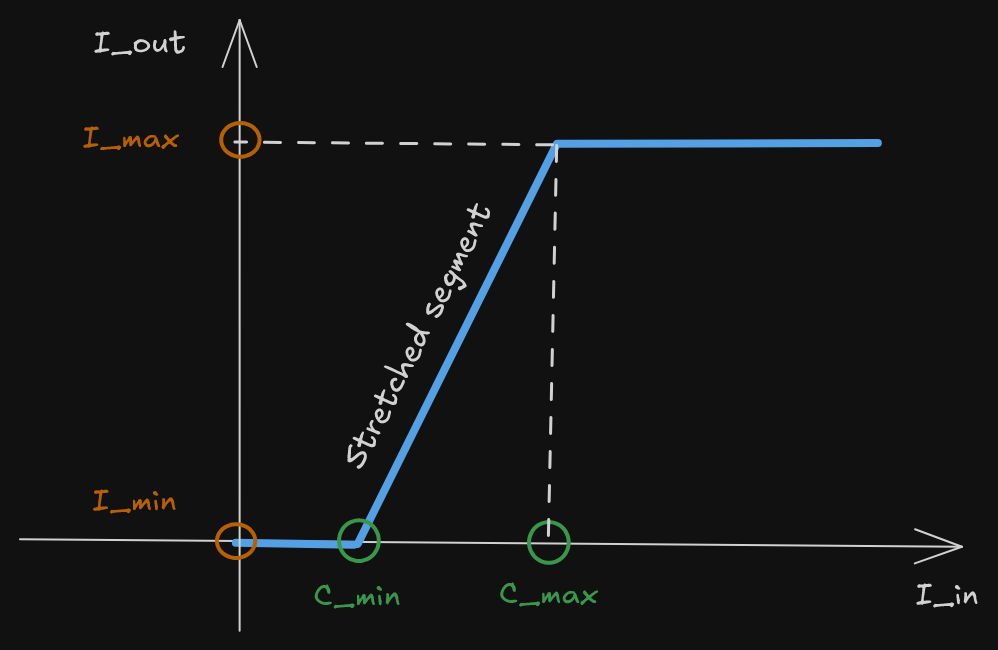

Here for the stretched segment, using the straight line equation $\frac{y_2 - y_1}{x_2 - x_1} = \frac{y - y_1}{x - x_1}$, we get -

$$\frac{I_{max} - I_{min}}{c_{max} - c_{min}} = \frac{I_{out} - I_{min}}{I_{in} - c_{min}}$$

$$or, \ I_{out} = \frac{(I_{in} - c_{min})*(I_{max} - I_{min})}{c_{max} - c_{min}} + I_{min}$$

Renaming the variables, $I_{out} \to I_{stretched}$ and $I_{in} \to I$, we get -

$$I_{streched} = \frac{I - c_{min}}{c_{max} - c_{min}}*(I_{max} - I_{min}) + I_{min}$$

We are not interested in the segment outside the stretched region as they will be clipped.

**Caveats -**

This formula works for only this kind of transformation. Different graphs, should be handled differently.

#Chest x-ray

(2831, 3537, 3)


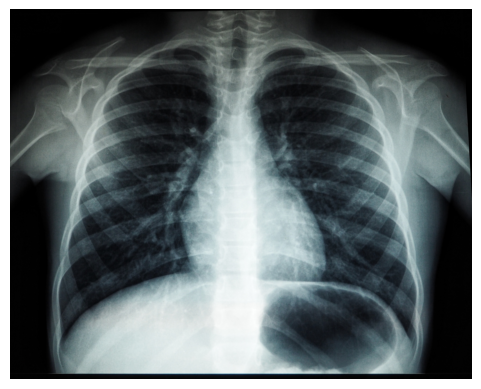

In [32]:
I = io.imread("/content/sample_2.jpeg")/255
plt.imshow(I)
plt.axis("off");

print(I.shape)

In [33]:
I = color.rgb2gray(I)

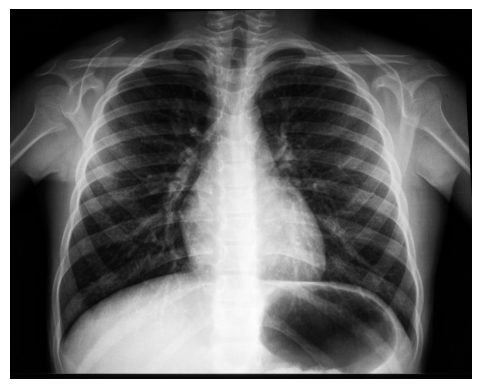

In [34]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

In this chest x-ray, a lot of details fall on the low intensity side and is quite hard to visualize. To increase the contrast on the low intensity side, we can use the logarithmic transformation -

$$I_{out} = c*log(1 + k*I_{in})$$

here, $k$ determines how strong the stretching should be and $c$ is the normalizing factor given by
 - $c = \frac{I_{max}}{log(1 + k*I_{max})}$  


 - $c = \frac{1}{max(log(1 + k*I_{in}))}$

It is to be noted that the standard log transformation formula is -

$$I_{out} = c*log(1 + I_{in})$$

However, we cannot control the stretching in this version.

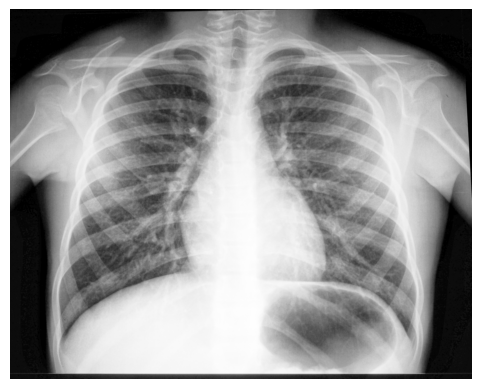

In [35]:
k = 20
I2 = np.log(1 + k*I)
I2 = I2/I2.max() #multiplying by c
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

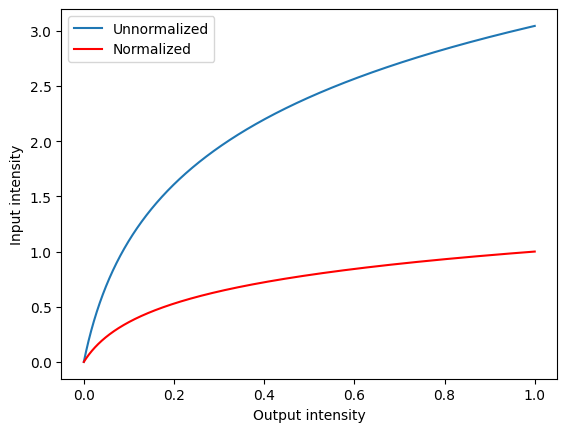

In [36]:
k = 20
i_1 = np.linspace(0, 1, 10000)
i_2 = np.log(1 + k*i_1)
i_3 = i_2/i_2.max()
plt.plot(i_1, i_2, label = 'Unnormalized');
plt.plot(i_1, i_3, color = 'red', label = 'Normalized');
plt.legend();
plt.xlabel("Output intensity");
plt.ylabel("Input intensity");

Normalizing the mapping function makes the map fit between the range [0, 1].

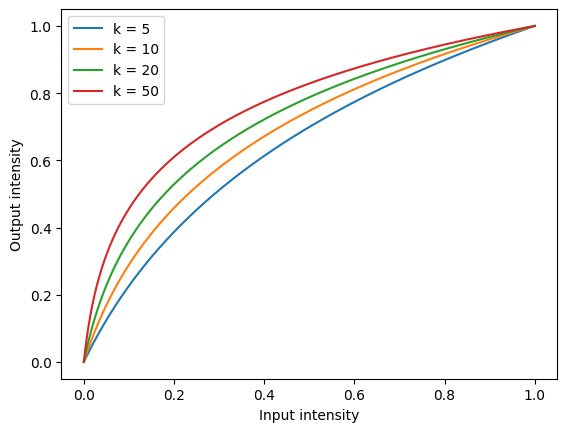

In [37]:
ks = [5, 10, 20, 50]
for k in ks:
  i_1 = np.linspace(0, 1, 10000)
  i_2 = np.log(1 + k*i_1)
  i_2 = i_2/i_2.max()
  plt.plot(i_1, i_2, label = "k = " + str(k));
  plt.legend();
  plt.ylabel("Output intensity");
  plt.xlabel("Input intensity");

As the value of k increases the lower intensity points are getting stretched whereas the higher intensity points are losing contrast.

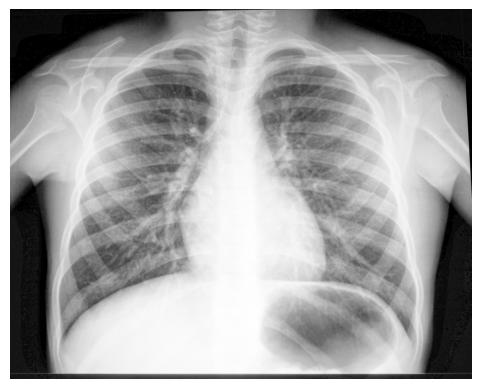

In [38]:
k = 50
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

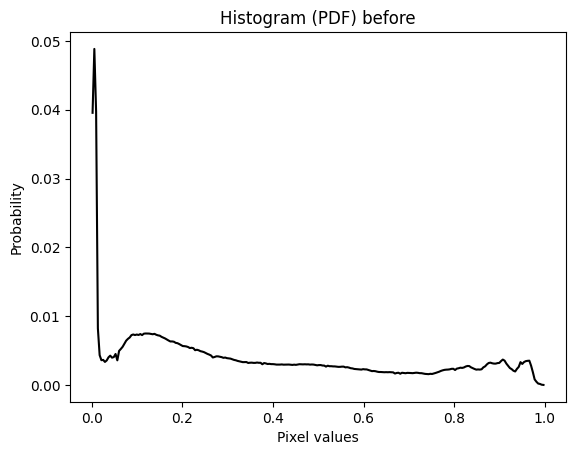

In [39]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) before");

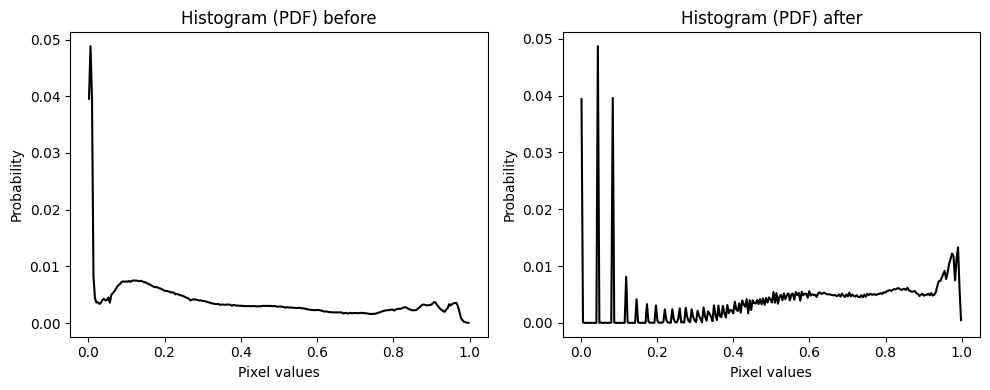

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

axes[0].plot(bins_hist, hist, 'k');
axes[0].set_xlabel("Pixel values")
axes[0].set_ylabel("Probability")
axes[0].set_title("Histogram (PDF) before");

hist, bins_hist = exposure.histogram(I2, nbins=256, normalize=True)

axes[1].plot(bins_hist, hist, 'k')
axes[1].set_xlabel("Pixel values")
axes[1].set_ylabel("Probability")
axes[1].set_title("Histogram (PDF) after");

plt.tight_layout()
plt.show()

Now lets say you want to highlight everything except the bones. How can we do that for this image? Since the bones are highlighted in the original image. We can invert the image.

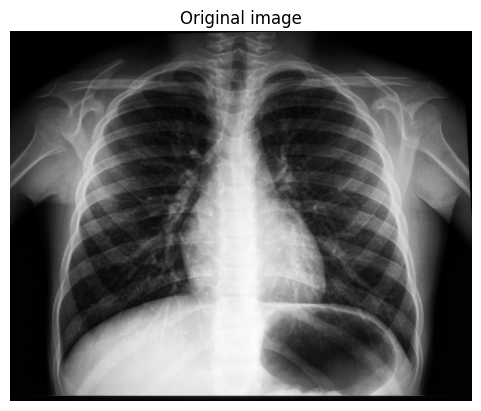

In [41]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");
plt.title('Original image');

In [43]:
I3 = 1 - I

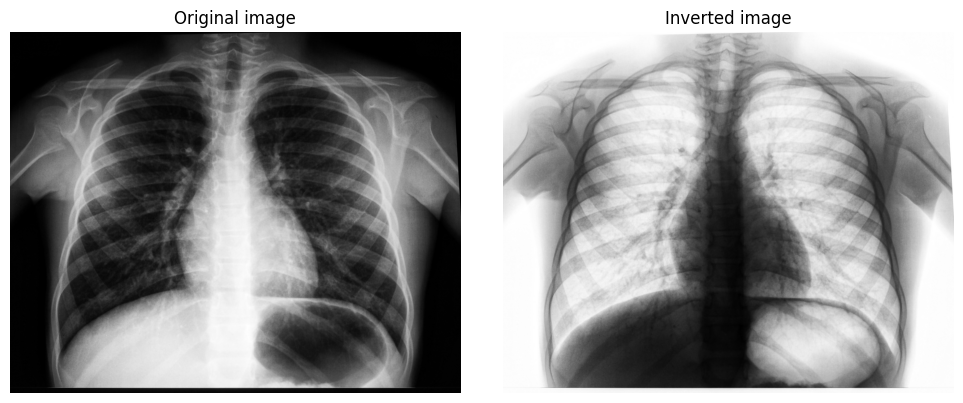

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(I, cmap = 'grey')
axes[0].axis("off");
axes[0].set_title('Original image');


axes[1].imshow(I3, cmap = 'grey');
axes[1].axis("off");
axes[1].set_title('Inverted image');

plt.tight_layout()
plt.show()

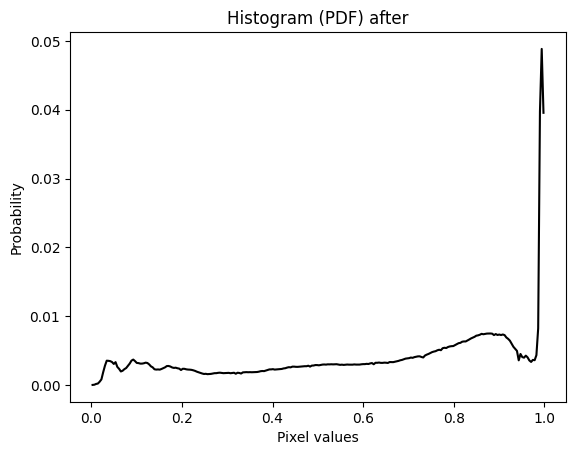

In [48]:
hist, bins_hist = exposure.histogram(I3, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) after");

We can achieve the same result using exponential transformation, also known as power law transformation -

$$ I_{out} = c*(I_{in})^\gamma$$

if $\gamma < 1$, we get log transformation as before

if $\gamma > 1$, we get anti-log transformation (stretches high intensity values)

In [49]:
gamma = 0.5
c = 1
I4 = c*(I ** gamma)
print(I4.min())
print(I4.max())

0.0
0.99958324649159


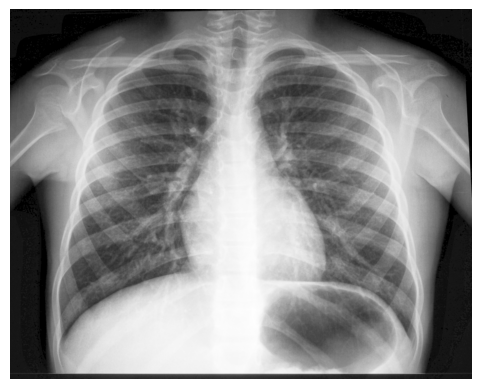

In [50]:
plt.imshow(I4, cmap = 'grey')
plt.axis("off");

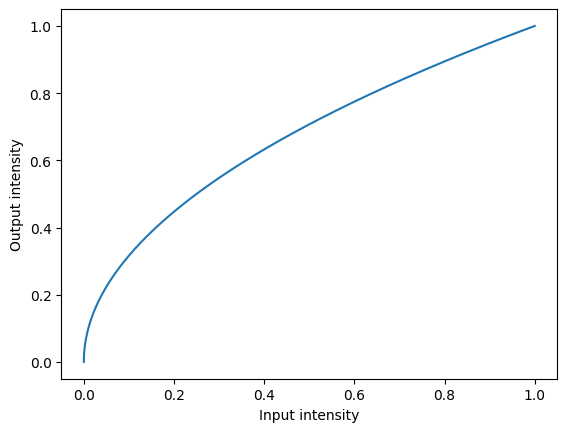

In [51]:
gamma = 0.5
c = 1
i_1 = np.linspace(0, 1, 10000)
i_2 = c*(i_1 ** gamma)
plt.plot(i_1, i_2);
plt.xlabel("Input intensity");
plt.ylabel("Output intensity");

You get a mapping function similar to the logarithmic transformation.

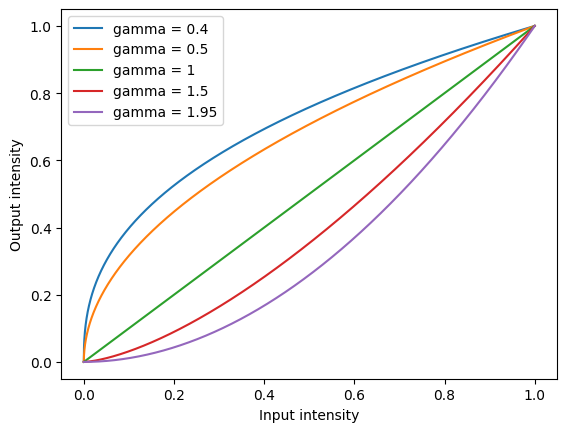

In [52]:
gammas = [0.4, 0.5, 1, 1.5, 1.95]
for gamma in gammas:
  c = 1
  i_1 = np.linspace(0, 1, 10000)
  i_2 = c*(i_1 ** gamma)
  plt.plot(i_1, i_2, label = "gamma = " + str(gamma));
  plt.legend();
  plt.xlabel("Input intensity");
  plt.ylabel("Output intensity");

Unlike logarithmic transformation, where you could only stretch the contrast of the lower intensity points, in exponential transformation, you can get contrast stretching on the lower intensity range or the higher intensity range based on the gamma value.

#Angiogram

In [53]:
I = io.imread("/content/sample_3.jpeg")
I = I/255
I.shape

(376, 374)

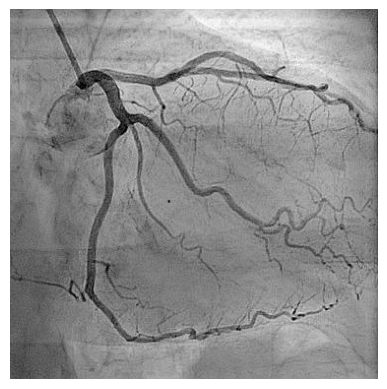

In [54]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

In angiogram, we are interested in observing the blood vessels. If that is the case, is there any way to segment the blood vessels from the image? We can apply gray-level slicing.

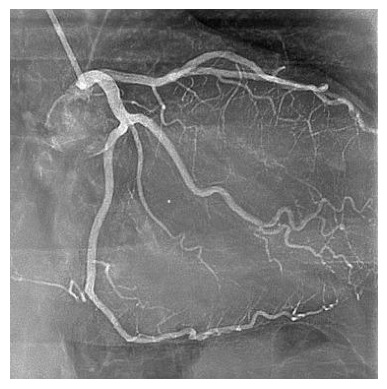

In [55]:
plt.imshow(1-I, cmap = 'grey')
plt.axis("off");

In [56]:
negImg = 1 - I

In [57]:
A = 0.6
B = 0.85

negImg[(negImg >= A) & (negImg <= B)] = 1

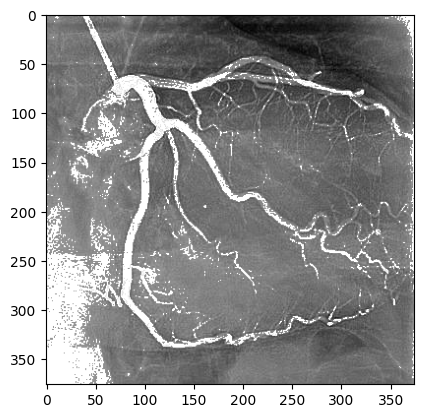

In [58]:
plt.imshow(negImg, cmap = 'grey');

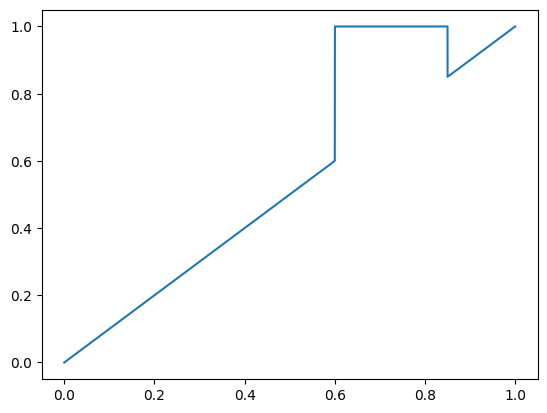

In [59]:
i_1 = np.linspace(0, 1, 10000)
A = 0.6
B = 0.85

i_2 = i_1.copy()
i_2[(i_2 >= A) & (i_2 <= B)] = 1

plt.plot(i_1, i_2);

In [60]:
negImg = 1 - I

In [61]:
A = 0.6
B = 0.85
negImg[negImg < A] = 0
negImg[negImg > B] = 0

negImg[(negImg >= A) & (negImg <= B)] = 1

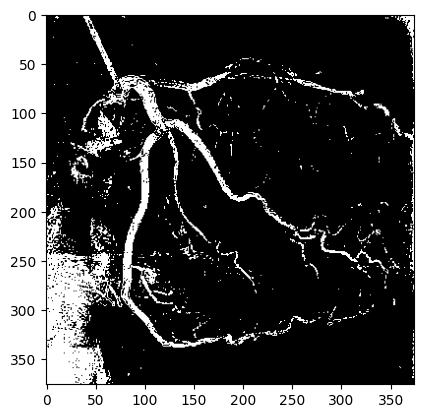

In [62]:
plt.imshow(negImg, cmap = 'grey');

This is a very crude segmentation and you can see the noise from the process at the bottom left of the binary image. Segmentation is an extensive task that cannot (in most cases) be accomplished just by thresholding.

Also the value was picked from the blood vessel. I am not sure how it was originally done, but I am guessing it was done in Matlab. However, you can do the same using matplotlib as well. You cannot do it in Google Colab, but you can do it in local IDEs.

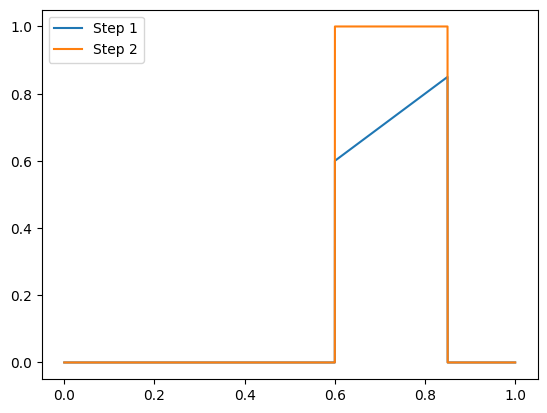

In [63]:
i_1 = np.linspace(0, 1, 10000)
A = 0.6
B = 0.85
i_2 = i_1.copy()
i_2[i_2 < A] = 0
i_2[i_2 > B] = 0

plt.plot(i_1, i_2, label = 'Step 1')

i_3 = i_2.copy()
i_3[(i_3 >= A) & (i_3 <= B)] = 1

plt.plot(i_1, i_3, label = 'Step 2')
plt.legend();